In [1]:
import datetime
import fnmatch
import matplotlib.cbook
import matplotlib.pyplot as plt
%matplotlib inline
from ipywidgets import interact
import numpy as np
import os
import glob
import pandas as pd
import pickle
import platform
from pylab import rcParams
import scipy
from scipy import stats
import warnings


warnings.filterwarnings("ignore",category=matplotlib.cbook.mplDeprecation)
startTimeNotebook = datetime.datetime.now()
if 'COLAB_GPU' in os.environ:
    !git clone https://github.com/HeathenToaster/code
    %cd code

# session lists in a .py file
# import sessionlists
%run sessionlists
from VIGOR_utils import *
from VIGOR_plotting import *
from VIGOR_MODELS_Functions import *

plt.style.use('./Figures/test.mplstyle')

In [2]:
#### Define folder with data 
if platform.system()=='Linux':
    root="/home/david/Desktop/ALLDATA"
    savePath="/home/david/Desktop/Save"
elif platform.system()=='Darwin':
    root="/Users/tom/Desktop/sequencesALLDATA"
    savePath="/Users/tom/Desktop/Save"
if 'COLAB_GPU' in os.environ:
    !gdown --id 1BSepSzm1-KQJlUvv8C23p_qyHvtzvrZ8
    !unzip -qq /content/code/sequencesALLDATA.zip
    root="/content/code/sequencesALLDATA"
    savePath="/content/Save"
    print("I'm running on Colab")
print("Path to data is: %s"%root)

retval = os.getcwd()
print("Current working directory: %s" % retval)
print("Save Path: ", savePath)

print(f'Found {len(glob.glob(root+"/*"))} rats in the data folder')

Path to data is: /home/david/Desktop/ALLDATA
Current working directory: /home/david/Desktop/code
Save Path:  /home/david/Desktop/Save
Found 19 rats in the data folder


In [37]:
rat_markers = {}
params = {}
nb_runsBin = {}
speedRunToLeftBin, speedRunToRightBin = {}, {}
timeRunToLeftBin, timeRunToRightBin = {}, {}
maxSpeedLeftBin, maxSpeedRightBin = {}, {}
timeStayInLeftBin, timeStayInRightBin = {}, {}
totalDistance, totalWater, total_trials = {}, {}, {}
XtrackRunToLeftBin, XtrackRunToRightBin = {}, {}
instantSpeedLeftBin, instantSpeedRightBin = {}, {}
trackTimeToLeftBin, trackTimeToRightBin = {}, {}
sequence = {}

# define colors for each rat
palette = {'RatF00': (0.4, 0.0, 0.0), 'RatF01': (0.55, 0.13, 0.13), 'RatF02': (0.8, 0.2, 0.2),
           'RatM00': (0.0, 0.4, 0.0), 'RatM01': (0.13, 0.55, 0.13), 'RatM02': (0.2, 0.8, 0.2),
           'RatF20': (0.4, 0.0, 0.0), 'RatF21': (0.55, 0.13, 0.13), 'RatF22': (0.8, 0.2, 0.2),
           'RatM20': (0.0, 0.4, 0.0), 'RatM21': (0.13, 0.55, 0.13), 'RatM22': (0.2, 0.8, 0.2),
           'RatF30': (0.4, 0.0, 0.0), 'RatF31': (0.55, 0.13, 0.13), 'RatF32': (0.8, 0.2, 0.2), 'RatF33': (0.8, 0.2, 0.2),
           'RatM30': (0.0, 0.4, 0.0), 'RatM31': (0.13, 0.55, 0.13), 'RatM32': (0.2, 0.8, 0.2), 
           'RatF30L': (0.4, 0.0, 0.0), 'RatF31L': (0.55, 0.13, 0.13), 'RatF32L': (0.8, 0.2, 0.2), 'RatF33L': (0.8, 0.2, 0.2),
           'RatM30L': (0.0, 0.4, 0.0), 'RatM31L': (0.13, 0.55, 0.13), 'RatM32L': (0.2, 0.8, 0.2)}

# define brain status (lesion/CNO/intact) for each rat, used in plots
# needs to be properly implemented, setting is in behav_params for each session.
brainstatus = {'RatF00': 'normal', 'RatF01': 'normal', 'RatF02': 'normal',
               'RatM00': 'normal', 'RatM01': 'normal', 'RatM02': 'normal',
               'RatF20': 'thcre', 'RatF21': 'thcre', 'RatF22': 'thcre',
               'RatM20': 'thcre', 'RatM21': 'thcre', 'RatM22': 'thcre',
               'RatF30': 'lesion', 'RatF31': 'lesion', 'RatF32': 'normal', 'RatF33': 'normal',
               'RatM30': 'lesion', 'RatM31': 'normal', 'RatM32': 'normal',
                'RatF30L': 'lesion', 'RatF31L': 'lesion', 'RatF32L': 'biglesion', 'RatF33L': 'biglesion',
                'RatM30L': 'lesion', 'RatM31L': 'biglesion', 'RatM32L': 'biglesion'
               }

markers = {'normal': 'o', 'thcre': 'd', 'lesion': 'x', 'biglesion': 'X'}
lines = {'normal': '-', 'thcre': '--', 'lesion': ':', 'biglesion': '-.'}
# define list of rats to be analyzed
# first batch  
# animalList = ['RatF00', 'RatF01', 'RatF02', 'RatM00', 'RatM01', 'RatM02']

# all rats
# animalList = [os.path.basename(path) for path in sorted(glob.glob(root+"/Rat*"))]
# animalList += ['RatF30L', 'RatF31L', 'RatF32L', 'RatF33L', 'RatM30L', 'RatM31L', 'RatM32L']

# INTACT RATS
animalList = ['RatF00', 'RatF01', 'RatF02', 'RatM00', 'RatM01', 'RatM02', 'RatF32', 'RatF33', 'RatM31', 'RatM32']
# THcre RATS
# animalList += ['RatF20', 'RatF21', 'RatF22', 'RatM20', 'RatM21', 'RatM22']

_map = plt.cm.get_cmap('jet')

for index, animal in enumerate(animalList):
    print(f'Loading data for {animal}')
    # define marker and color for each rat, used in plots
    if fnmatch.fnmatch(animal, 'RatF*'):
        rat_markers[animal]=[_map(index/len(animalList)), markers[brainstatus[animal]], lines[brainstatus[animal]]]
    elif fnmatch.fnmatch(animal, 'RatM*'):
        rat_markers[animal]=[_map(index/len(animalList)), markers[brainstatus[animal]], lines[brainstatus[animal]]]
    elif fnmatch.fnmatch(animal, 'Rat00*'):
        rat_markers[animal]=[(0.0, 0.0, 0.0), "$\u2426$",]
    else:
        print("error, this is not a rat you got here")

    # loop over all sessions for each rat and get the pickled preprocessed data. Data is processed in VIGOR_Preprocess.py
    # data (list or list of lists) for each variable is stored in a dictionary with keys (animal, session)
    for session in sorted(matchsession(animal, dist60+dist90+dist120 + TM20+TM10+TM2+TMrev2+TMrev10+TMrev20)):
                                                #  dist60bis+dist90bis+dist120bis)):

        # get the preprocessed data from the pickle file
        # In this notebook we only need the sequence of events, so we only load that
        biglesion = True if 'L' in session else False
        sequence[animal, session] = get_from_pickle(root, animal[0:6], session, name="sequence.p", biglesion=biglesion)

        params[animal, session]     = get_from_pickle(root, animal[0:6], session, name="params.p", biglesion=biglesion)
        nb_runsBin[animal, session] = get_from_pickle(root, animal[0:6], session, name="nbRuns.p", biglesion=biglesion)
        speedRunToLeftBin[animal, session],  speedRunToRightBin[animal, session]  = get_from_pickle(root, animal[0:6], session, name="avgSpeed.p", biglesion=biglesion)
        maxSpeedLeftBin[animal, session],    maxSpeedRightBin[animal, session]    = get_from_pickle(root, animal[0:6], session, name="maxSpeed.p", biglesion=biglesion)
        timeStayInLeftBin[animal, session],  timeStayInRightBin[animal, session]  = get_from_pickle(root, animal[0:6], session, name="timeinZone.p", biglesion=biglesion)
        timeRunToLeftBin[animal, session],   timeRunToRightBin[animal, session]   = get_from_pickle(root, animal[0:6], session, name="timeRun.p", biglesion=biglesion)
        XtrackRunToLeftBin[animal, session], XtrackRunToRightBin[animal, session] = get_from_pickle(root, animal[0:6], session, name="trackPos.p", biglesion=biglesion)
        instantSpeedLeftBin[animal, session],instantSpeedRightBin[animal, session]= get_from_pickle(root, animal[0:6], session, name="trackSpeed.p", biglesion=biglesion)
        trackTimeToLeftBin[animal, session], trackTimeToRightBin[animal, session] = get_from_pickle(root, animal[0:6], session, name="trackTime.p", biglesion=biglesion)
        totalDistance[animal, session],      totalWater[animal, session], total_trials[animal, session] = get_from_pickle(root, animal[0:6], session, name="misc.p", biglesion=biglesion)


Loading data for RatF00
Loading data for RatF01
Loading data for RatF02
Loading data for RatM00
Loading data for RatM01
Loading data for RatM02
Loading data for RatF32
Loading data for RatF33
Loading data for RatM31
Loading data for RatM32


In [142]:
_map = plt.cm.get_cmap('jet')

for index, animal in enumerate(animalList):

    print(f'Loading data for {animal}')
    # define marker and color for each rat, used in plots
    if fnmatch.fnmatch(animal, 'RatF*'):
        rat_markers[animal]=[_map(index/len(animalList)), 'd', lines[brainstatus[animal]]]
    elif fnmatch.fnmatch(animal, 'RatM*'):
        rat_markers[animal]=[_map(index/len(animalList)), 'o', lines[brainstatus[animal]]]
    elif fnmatch.fnmatch(animal, 'Rat00*'):
        rat_markers[animal]=[(0.0, 0.0, 0.0), "$\u2426$",]
    else:
        print("error, this is not a rat you got here")

Loading data for RatF00
Loading data for RatF01
Loading data for RatF02
Loading data for RatM00
Loading data for RatM01
Loading data for RatM02
Loading data for RatF32
Loading data for RatF33
Loading data for RatM31
Loading data for RatM32


In [151]:

# plot variable median/mean fir each blockFdodger
def plot_median_per_bin(data, rewardProbaBlock, blocks, barplotaxes, color, stat,
                        xyLabels=[" ", " ", " ", " "], title="", scatter=False, ax=None):
    warnings.simplefilter("ignore", category=RuntimeWarning)
    if ax is None:
        ax = plt.gca()
    for i in range(0, len(blocks)):
        ax.axvspan(blocks[i][0]/60, blocks[i][1]/60, color='grey', alpha=rewardProbaBlock[i]/250, label="%reward: " + str(rewardProbaBlock[i]) if (i == 0 or i == 1) else "")
        if scatter:
            ax.scatter(np.random.normal(((blocks[i][1] + blocks[i][0])/120), 1, len(data[i])), data[i], s=5, color=color[0])

    if stat == "Avg. ":
        ax.plot([(blocks[i][1] + blocks[i][0])/120 for i in range(0, len(blocks))], [np.mean(data[i]) for i in range(0, len(blocks))], marker='o', ms=7, linewidth=2, color=color[0])
        if isinstance(data[0], list):
            ax.errorbar([(blocks[i][1] + blocks[i][0])/120 for i in range(0, len(blocks))], [np.mean(data[i]) for i in range(0, len(blocks))], yerr=[stats.sem(data[i]) for i in range(0, len(blocks))], fmt='o', color=color[0], ecolor='black', elinewidth=1, capsize=0);

    elif stat == "Med. ":
        ax.plot([(blocks[i][1] + blocks[i][0])/120 for i in range(0, len(blocks))], [np.median(data[i]) for i in range(0, len(blocks))], marker='o', ms=7, linewidth=2, color=color[0])
        if isinstance(data[0], list):
            ax.errorbar([(blocks[i][1] + blocks[i][0])/120 for i in range(0, len(blocks))], [np.median(data[i]) for i in range(0, len(blocks))], yerr=[stats.sem(data[i]) for i in range(0, len(blocks))], fmt='o', color=color[0], ecolor='black', elinewidth=1, capsize=3);

    ax.set_title(title)
    ax.set_xlabel(xyLabels[0])
    ax.set_ylabel("Average " + xyLabels[1], color=color[0])
    ax.set_xlim([barplotaxes[0], barplotaxes[1]])
    ax.set_ylim([barplotaxes[2], barplotaxes[3]])
    return ax

def across_session_plot(plot, animal_list, session_list, dataLeft, dataRight, experiment, params, plot_axes, ticks, titles_plot_xaxis_yaxis, datatype, marker, ax=None):
    if ax is None:
        ax = plt.gca()
    ax.set_title(titles_plot_xaxis_yaxis[0], fontsize=16)
    ax.set_xlabel(titles_plot_xaxis_yaxis[1], fontsize=16)
    ax.set_ylabel(titles_plot_xaxis_yaxis[2], fontsize=16)
    ax.set_xlim(plot_axes[0], plot_axes[1])
    ax.set_ylim(plot_axes[2], plot_axes[3])
    if ticks[0] != []:
        ax.set_xticks(ticks[0])
    if ticks[1] != []:
        ax.set_yticks(ticks[1])
    ax.tick_params(width=1.5, labelsize=12)
    # if experiment == 'TM_ON': ax.tick_params(axis = 'x', rotation = 45)
    ax.spines['top'].set_color("none")
    ax.spines['right'].set_color("none")
    ax.spines['bottom'].set_linewidth(1.5)
    ax.spines['left'].set_linewidth(1.5)
    ax.yaxis.set_label_coords(-0.22, 0.5)
    ax.patch.set_facecolor('grey')
    ax.patch.set_alpha(90/250 if plot == "90%" else
                       10/250 if plot == "10%" else
                       0)
    ax.yaxis.label.set_color('cyan' if datatype == 'avgrunspeed' else
                             'dodgerblue' if datatype == 'runningtime' else
                             'orange' if datatype == 'idletime' else
                             'red'if datatype == 'maxspeed' else 'k')

    a, b, c, d, e, f, g, h, i, j, k, l = 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0
    LW = 1
    if experiment == 'Distance':
        data90_60, data90_90, data90_120, data10_60, data10_90, data10_120 = separate_data(animal_list, session_list, dataLeft, dataRight, experiment, params, datatype, False)
        for animal in animal_list:
            # if datatype == 'runningtime':
            realdist60, realdist90, realdist120 = ticks[2]
            x = (np.nanmean(realdist60[animal]), np.nanmean(realdist90[animal]), np.nanmean(realdist120[animal]))
            ax.set_xticks([int(np.nanmean([np.nanmean(realdist60[animal]) for animal in animal_list])),
                            int(np.nanmean([np.nanmean(realdist90[animal]) for animal in animal_list])),
                            int(np.nanmean([np.nanmean(realdist120[animal]) for animal in animal_list]))])
            ax.set_xlim(plot_axes[0], plot_axes[1])

            # else:
            #     x = (60, 90, 120)

            if datatype == 'nb_runs':
                a = np.mean(data90_60[animal])
                b = np.mean(data90_90[animal])
                c = np.mean(data90_120[animal])
                d = np.mean(data10_60[animal])
                e = np.mean(data10_90[animal])
                f = np.mean(data10_120[animal])
            else:
                a = np.nanmean([item for sublist in data90_60[animal] for item in sublist])
                b = np.nanmean([item for sublist in data90_90[animal] for item in sublist])
                c = np.nanmean([item for sublist in data90_120[animal] for item in sublist])
                d = np.nanmean([item for sublist in data10_60[animal] for item in sublist])
                e = np.nanmean([item for sublist in data10_90[animal] for item in sublist])
                f = np.nanmean([item for sublist in data10_120[animal] for item in sublist])

            if plot == "90%":
                ax.plot(x, (a, b, c), marker=marker[animal][1], markersize=6, linestyle=marker[animal][2], linewidth=LW, color=marker[animal][0])
                # ax.errorbar(x, (a, b, c), yerr = (stats.std([item for sublist in data90_60[animal]  for item in sublist]),  stats.std([item for sublist in data90_90[animal]  for item in sublist]), stats.std([item for sublist in data90_120[animal] for item in sublist])), color = marker[animal][0], linestyle=marker[animal][2])
            if plot == "10%":
                ax.plot(x, (d, e, f), marker=marker[animal][1], markersize=6, linestyle=marker[animal][2], linewidth=LW, color=marker[animal][0])
                # ax.errorbar(x, (d, e, f), yerr = (stats.std([item for sublist in data10_60[animal]  for item in sublist]),  stats.std([item for sublist in data10_90[animal]  for item in sublist]), stats.std([item for sublist in data10_120[animal] for item in sublist])), color = marker[animal][0], linestyle=marker[animal][2])
            if plot == "%":
                ax.plot(x, (d/a, e/b, f/c), marker=marker[animal][1], markersize=6, linestyle=marker[animal][2], linewidth=LW, color=marker[animal][0])

    if experiment == 'TM_ON':
        data90_rev20, data90_rev10, data90_rev2, data90_2, data90_10, data90_20, data10_rev20, data10_rev10, data10_rev2, data10_2, data10_10, data10_20 = separate_data(animal_list, session_list, dataLeft, dataRight, experiment, params, datatype, False)
        for animal in animal_list:
            x = (-20, -10, -2, 2, 10, 20)
            if datatype == 'nb_runs':
                a = np.mean(data90_rev20[animal])
                b = np.mean(data90_rev10[animal])
                c = np.mean(data90_rev2[animal])
                d = np.mean(data90_2[animal])
                e = np.mean(data90_10[animal])
                f = np.mean(data90_20[animal])

                g = np.mean(data10_rev20[animal])
                h = np.mean(data10_rev10[animal])
                i = np.mean(data10_rev2[animal])
                j = np.mean(data10_2[animal])
                k = np.mean(data10_10[animal])
                l = np.mean(data10_20[animal])
            else:
                a = np.nanmean([item for sublist in data90_rev20[animal] for item in sublist])
                b = np.nanmean([item for sublist in data90_rev10[animal] for item in sublist])
                c = np.nanmean([item for sublist in data90_rev2[animal] for item in sublist])
                d = np.nanmean([item for sublist in data90_2[animal] for item in sublist])
                e = np.nanmean([item for sublist in data90_10[animal] for item in sublist])
                f = np.nanmean([item for sublist in data90_20[animal] for item in sublist])

                g = np.nanmean([item for sublist in data10_rev20[animal] for item in sublist])
                h = np.nanmean([item for sublist in data10_rev10[animal] for item in sublist])
                i = np.nanmean([item for sublist in data10_rev2[animal] for item in sublist])
                j = np.nanmean([item for sublist in data10_2[animal] for item in sublist])
                k = np.nanmean([item for sublist in data10_10[animal] for item in sublist])
                l = np.nanmean([item for sublist in data10_20[animal] for item in sublist])

            if plot == "90%":
                ax.plot(x, (a, b, c, d, e, f), marker=marker[animal][1], markersize=6, linestyle=marker[animal][2], linewidth=LW, color=marker[animal][0])
            if plot == "10%":
                ax.plot(x, (g, h, i, j, k, l), marker=marker[animal][1], markersize=6, linestyle=marker[animal][2], linewidth=LW, color=marker[animal][0])
            if plot == "%":
                ax.plot(x, (g/a, h/b, i/c, j/d, k/e, l/f), marker=marker[animal][1], markersize=6, linestyle=marker[animal][2], linewidth=LW, color=marker[animal][0])
    return ax


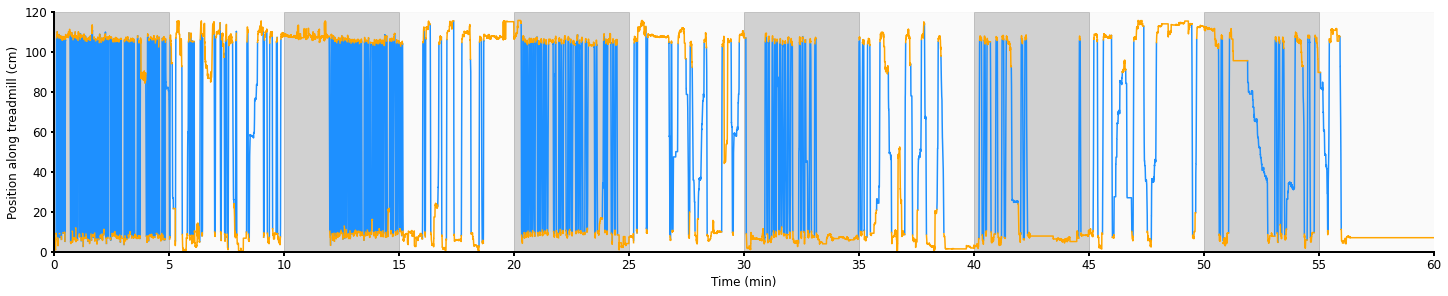

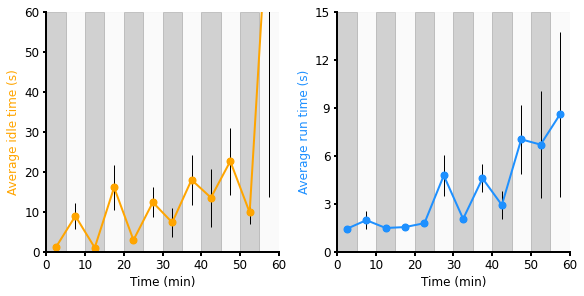

In [157]:

animal, session = 'RatM01', 'RatM01_2021_07_22_17_14_48'  # 'RatF00', 'RatF00_2021_07_24_15_28_05'
animal, session = 'RatF02', 'RatF02_2021_07_22_18_14_16'
example_params = get_from_pickle(root, animal, session, name="params.p")
example_nbRuns = get_from_pickle(root, animal, session, name="nbRuns.p")
example_idleTimeInLeftBin, example_idleTimeInRightBin = get_from_pickle(root, animal, session, name="timeinZone.p")
example_avgspeedToLeftBin, example_avgspeedToRightBin = get_from_pickle(root, animal, session, name="avgSpeed.p")
example_runningTimeInLeftBin, example_runningTimeInRightBin = get_from_pickle(root, animal, session, name="timeRun.p")



fig, axs = plt.subplots(1, figsize = (20, 4))
# plot the trajectory
plot_animal_trajectory(root=root, animal=animal, session=session, params=example_params, barplotaxes=[0, 3600, 0, 120], 
                 xyLabels=["Time (min)", "Position along treadmill (cm)"], title="Position of example animal across a 120 cm session", ax=axs)


scat = False
stat ='Avg. '
fig, axs = plt.subplots(1, 2, figsize = (8, 4))
# plot_median_per_bin([example_nbRuns[i]/5 for i in range(0, 12)], 
# example_params['rewardProbaBlock'], example_params['blocks'], barplotaxes = [0, 3600/60, 0, 25], 
# color = ['k'], xyLabels=["Time (min)", "\u0023 runs / min"], title="", stat='Med. ', ax=axs[0]);

plot_median_per_bin([example_idleTimeInLeftBin[i]+example_idleTimeInRightBin[i] for i in range(0, 12)], 
                example_params['rewardProbaBlock'], example_params['blocks'], barplotaxes=[0, 3600/60, 0, 60], 
                color=['orange'], xyLabels=["Time (min)","idle time (s)"], title="", scatter=scat, stat=stat, ax=axs[0]);

# # plot the median running time in each time block
# plot_median_per_bin([example_avgspeedToLeftBin[i]+example_avgspeedToRightBin[i] for i in range(0, 12)], 
#                 example_params['rewardProbaBlock'], example_params['blocks'], barplotaxes=[0, 3600/60, 0, 100], 
#                 color=['cyan'], xyLabels=["Time (min)","running time (s)"], title="", scatter=scat, stat='Med. ', ax=axs[2]);

# plot the median running time in each time block
plot_median_per_bin([example_runningTimeInLeftBin[i]+example_runningTimeInRightBin[i] for i in range(0, 12)], 
                example_params['rewardProbaBlock'], example_params['blocks'], barplotaxes=[0, 3600/60, 0., 15], 
                color=['dodgerblue'], xyLabels=["Time (min)","run time (s)"], title="", scatter=scat, stat=stat, ax=axs[1]);
axs[1].set_yticks([0, 3, 6, 9, 12, 15])

In [ ]:
fig, axs = plt.subplots(1, figsize = (4, 4))
# plot the trajectory
plot_animal_trajectory(root=root, animal=animal, session=session, params=example_params, barplotaxes=[735.8, 750, 0, 120], 
                 xyLabels=["Time (min)", "Position along treadmill (cm)"], title="Position of example animal across a 120 cm session", ax=axs)


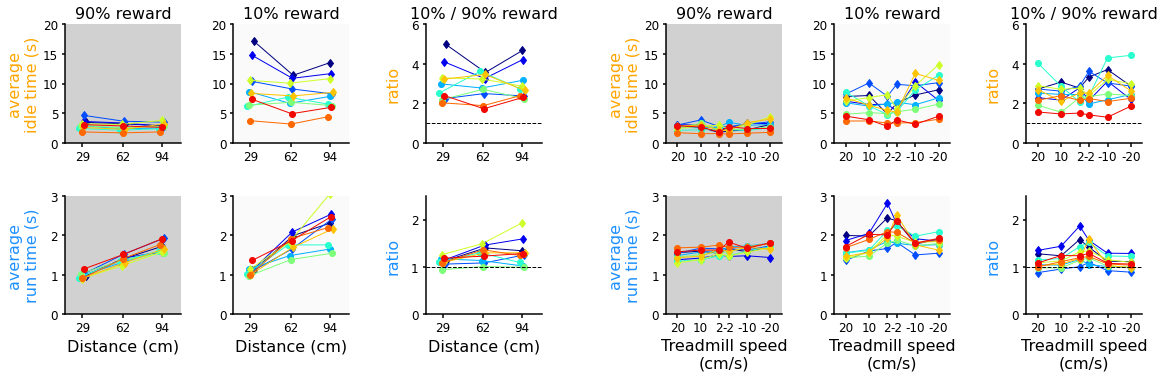

In [153]:
#TAC plots
fig = plt.figure(constrained_layout = False, figsize=(30.5, 13)) #10, 14
fig.suptitle("", y=0.9, fontsize = 24)
gs = fig.add_gridspec(29, 71)

row1 = slice(0, 5)
row2 = slice(7, 12)
row3 = slice(14, 19)
row4 = slice(21, 26)

col1 = slice(0, 5)
col2 = slice(7, 12)


# compute true run distance
realdist60 = {}
realdist90 = {}
realdist120= {}

# compute the running distance for each run (pos start - pos end) for each distance configuration
for animal in animalList:
    realdist60[animal], realdist90[animal], realdist120[animal] = ([] for _ in range(3))
    for session in sorted(matchsession(animal, dist60)):
        for i in range(0, 12):
            realdist60[animal] = np.append(realdist60[animal], [abs(r[0] - r[-1]) for r in XtrackRunToRightBin[animal, session][i]])
            realdist60[animal] = np.append(realdist60[animal], [abs(l[0] - l[-1]) for l in XtrackRunToLeftBin[animal, session][i]])
    for session in sorted(matchsession(animal, dist90)):   
        for i in range(0, 12):
            realdist90[animal] = np.append(realdist90[animal], [abs(r[0] - r[-1]) for r in XtrackRunToRightBin[animal, session][i]])
            realdist90[animal] = np.append(realdist90[animal], [abs(l[0] - l[-1]) for l in XtrackRunToLeftBin[animal, session][i]])
    for session in sorted(matchsession(animal, dist120)):
        for i in range(0, 12):
            realdist120[animal] = np.append(realdist120[animal], [abs(r[0] - r[-1]) for r in XtrackRunToRightBin[animal, session][i]])
            realdist120[animal] = np.append(realdist120[animal], [abs(l[0] - l[-1]) for l in XtrackRunToLeftBin[animal, session][i]])



session_list = dist60+dist90+dist120
experiment = 'Distance'

ax10 = fig.add_subplot(gs[row1, col1])
ax10 = across_session_plot("90%", animalList, session_list, timeStayInLeftBin, timeStayInRightBin, experiment, params, plot_axes = [15, 110, 0, 20], ticks = [[60, 90, 120],[0, 5, 10, 15, 20], [realdist60, realdist90, realdist120]], titles_plot_xaxis_yaxis = ['90% reward', '', 'average\nidle time (s)'], datatype = 'idletime', marker=rat_markers)
# ax10.set_xticklabels(['S', 'M', 'L'])
ax11 = fig.add_subplot(gs[row1, col2])
ax11 = across_session_plot("10%", animalList, session_list, timeStayInLeftBin, timeStayInRightBin, experiment, params, plot_axes = [15, 110, 0, 20], ticks = [[60, 90, 120],[0, 5, 10, 15, 20], [realdist60, realdist90, realdist120]], titles_plot_xaxis_yaxis = ['10% reward', '', ''], datatype = 'idletime', marker=rat_markers)
# ax11.set_xticklabels(['S', 'M', 'L'])
ax12 = fig.add_subplot(gs[row1, col3])
ax12 = across_session_plot("%",   animalList, session_list, timeStayInLeftBin, timeStayInRightBin, experiment, params, plot_axes = [15, 110, 0, 6], ticks = [[60, 90, 120],[0, 2, 4, 6], [realdist60, realdist90, realdist120]], titles_plot_xaxis_yaxis = ['10% / 90% reward', '', 'ratio'], datatype = 'idletime', marker=rat_markers)
ax12.axhline(y=1, color='k', linestyle='--', linewidth=1)
# ax12.set_xticklabels(['S', 'M', 'L'])

ax30 = fig.add_subplot(gs[row2, col1])
ax30 = across_session_plot("90%", animalList, session_list, timeRunToLeftBin, timeRunToRightBin, experiment, params, plot_axes = [15, 110, 0, 3], ticks = [[60, 90, 120],[0, 1, 2, 3], [realdist60, realdist90, realdist120]], titles_plot_xaxis_yaxis = ['', 'Distance (cm)', 'average\nrun time (s)'], datatype = 'runningtime', marker=rat_markers)
# ax30.set_xticklabels(['S', 'M', 'L'])
ax31 = fig.add_subplot(gs[row2, col2])
ax31 = across_session_plot("10%", animalList, session_list, timeRunToLeftBin, timeRunToRightBin, experiment, params, plot_axes = [15, 110, 0, 3], ticks = [[60, 90, 120],[0, 1, 2, 3], [realdist60, realdist90, realdist120]], titles_plot_xaxis_yaxis = ['', 'Distance (cm)', ''], datatype = 'runningtime', marker=rat_markers)
# ax31.set_xticklabels(['S', 'M', 'L'])
ax32 = fig.add_subplot(gs[row2, col3])
ax32 = across_session_plot("%",   animalList, session_list, timeRunToLeftBin, timeRunToRightBin, experiment, params, plot_axes = [15, 110, 0, 2.5], ticks = [[60, 90, 120],[0, 1, 2], [realdist60, realdist90, realdist120]], titles_plot_xaxis_yaxis = ['', 'Distance (cm)', 'ratio'], datatype = 'runningtime', marker=rat_markers)
ax32.axhline(y=1, color='k', linestyle='--', linewidth=1)
# ax32.set_xticklabels(['S', 'M', 'L'])

session_list = TM20+TM10+TM2+TMrev2+TMrev10+TMrev20
experiment = 'TM_ON'

ax10 = fig.add_subplot(gs[row1, col4])
ax10 = across_session_plot("90%", animalList, session_list, timeStayInLeftBin, timeStayInRightBin, experiment, params, plot_axes = [25, -25, 0, 20], ticks = [[-20, -10, -2, 2, 10, 20],[0, 5, 10, 15, 20]], titles_plot_xaxis_yaxis = ['90% reward', '', 'average\nidle time (s)'], datatype = 'idletime', marker=rat_markers)
ax11 = fig.add_subplot(gs[row1, col5])
ax11 = across_session_plot("10%", animalList, session_list, timeStayInLeftBin, timeStayInRightBin, experiment, params, plot_axes = [25, -25, 0, 20], ticks = [[-20, -10, -2, 2, 10, 20],[0, 5, 10, 15, 20]], titles_plot_xaxis_yaxis = ['10% reward', '', ''], datatype = 'idletime', marker=rat_markers)
ax12 = fig.add_subplot(gs[row1, col6])
ax12 = across_session_plot("%",   animalList, session_list, timeStayInLeftBin, timeStayInRightBin, experiment, params, plot_axes = [25, -25, 0, 6], ticks = [[-20, -10, -2, 2, 10, 20],[0, 2, 4, 6]], titles_plot_xaxis_yaxis = ['10% / 90% reward', '', 'ratio'], datatype = 'idletime', marker=rat_markers)
ax12.axhline(y=1, color='k', linestyle='--', linewidth=1)

ax30 = fig.add_subplot(gs[row2, col4])
ax30 = across_session_plot("90%", animalList, session_list, timeRunToLeftBin, timeRunToRightBin, experiment, params, plot_axes = [25, -25, 0, 3], ticks = [[-20, -10, -2, 2, 10, 20],[0, 1, 2, 3]], titles_plot_xaxis_yaxis = ['', 'Treadmill speed\n(cm/s)', 'average\nrun time (s)'], datatype = 'runningtime', marker=rat_markers)
ax31 = fig.add_subplot(gs[row2, col5])
ax31 = across_session_plot("10%", animalList, session_list, timeRunToLeftBin, timeRunToRightBin, experiment, params, plot_axes = [25, -25, 0, 3], ticks = [[-20, -10, -2, 2, 10, 20],[0, 1, 2, 3]], titles_plot_xaxis_yaxis = ['', 'Treadmill speed\n(cm/s)', ''], datatype = 'runningtime', marker=rat_markers)
ax32 = fig.add_subplot(gs[row2, col6])
ax32 = across_session_plot("%",   animalList, session_list, timeRunToLeftBin, timeRunToRightBin, experiment, params, plot_axes = [25, -25, 0, 2.5], ticks = [[-20, -10, -2, 2, 10, 20],[0, 1, 2]], titles_plot_xaxis_yaxis = ['', 'Treadmill speed\n(cm/s)', 'ratio'], datatype = 'runningtime', marker=rat_markers)
ax32.axhline(y=1, color='k', linestyle='--', linewidth=1)

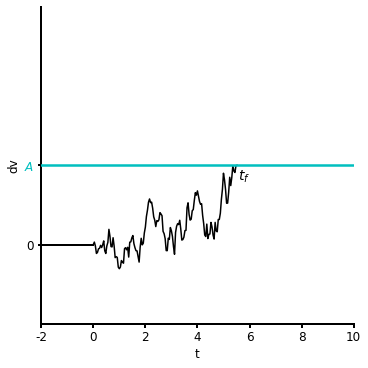

In [127]:
std = 1
t0 = 2
N = 100
def plot_DDMexample1(mean, std, A, t0, N=100, title=''):
    """plot example of DDM with specified parameters"""

    fig, ax = plt.subplots(1, 1, figsize=(5, 5))
    trials = [generate_trials(mean, std, A, 0) for _ in range(N)]

    example_plot = True
    for dv in trials:
        dv[-1] = A
        x = np.arange(len(dv))/25
        y = dv
        if len(y) > 5*25 and example_plot:
            ax.plot(x, y, c='k', lw=1.5, zorder=4)
            ax.annotate(r'$t_f$', (len(y)/25, A-2), (0, 1), xycoords="data", textcoords="offset points", color="k", zorder=4, fontsize=14)
            example_plot = False
        # ax.plot(x, y, c='orange', alpha=.5, zorder=3)

    waits = np.array([len(t)/25 for t in trials], dtype=np.float64)

    ax.axhline(A, c='c', zorder=5, lw=2.5)
    ax.set_yticks([0, A])
    ax.set_yticklabels([0, r'$A$'])
    ax.get_yticklabels()[1].set_color('c')
    ax.set_xlabel('t')
    ax.set_ylabel('dv')
    ax.set_title(title)
    ax.set_ylim(-10, 30)
    ax.set_xlim(-2, 10)
    ax.plot((0, -t0), (0, 0), zorder=5, lw=2, c='k')
    plt.savefig('dv.png', transparent=True, dpi=300)

plot_DDMexample1(.25, std, 10, t0, N=N, title="")

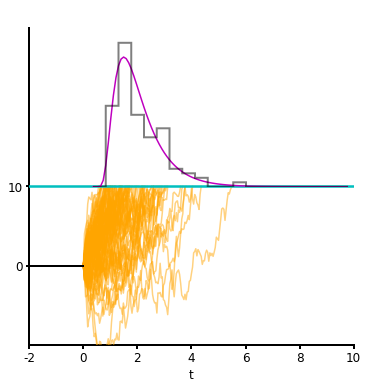

In [149]:
std = 1
t0 = 2
N = 100
def plot_DDMexample2(mean, std, A, t0, N=100, title=''):
    """plot example of DDM with specified parameters"""

    fig, ax = plt.subplots(1, 1, figsize=(5, 5))
    trials = [generate_trials(mean, std, A, 0) for _ in range(N)]

    example_plot = True
    for dv in trials:
        dv[-1] = A
        x = np.arange(len(dv))/25
        y = dv

        ax.plot(x, y, c='orange', alpha=.5, zorder=3)

    waits = np.array([len(t)/25 for t in trials], dtype=np.float64)

    waitmean = A / mean * np.tanh(mean * A)  #  + t0
    ax.axhline(A, c='c', zorder=5, lw=2.5)
    ax.set_yticks([0, A])

    ax.set_xlabel('t')

    ax.set_title(title)
    ax.set_ylim(-10, 30)
    ax.set_xlim(-2, 10)
    ax.plot((0, -t0), (0, 0), c="k", zorder=5, lw=2)
    plt.savefig('DDMparams1.png', transparent=True, dpi=300)


        # inset distribution
    l, b, h, w = 0.105, .55, .5, .85
    ax1 = fig.add_axes([l, b, w, h])
    mx = 300
    bins = np.arange(0, mx+1, .5)
    ax1.hist(waits, bins=bins, color='k',
             alpha=.5, zorder=4, histtype="step", lw=2,
             # cumulative=1,
             density=True,
             weights=np.ones_like(waits) / len(waits),
             )
    ax1.set_ylim(0, 0.8)
    ax1.set_xlim(-2, 10)
    ax1.set_ylabel('PDF')
    ax1.axis('off')

    # inset

    plt.savefig('DDM1.png', transparent=True, dpi=300)



    p, _ = wald_fit(waits)
    x = np.linspace(0, 1000, 10000)
    ax1.plot(x, Wald_pdf(x, *p), 'm-', label='Default')
    plt.savefig('DDMwald.png', transparent=True, dpi=300)




plot_DDMexample2(.25, std, 10, t0, N=N, title="")

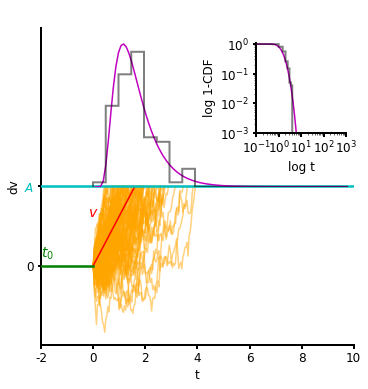

In [147]:
def plot_DDMexample3(mean, std, A, t0, N=100, title=''):
    """plot example of DDM with specified parameters"""

    fig, ax = plt.subplots(1, 1, figsize=(5, 5))
    trials = [generate_trials(mean, std, A, 0) for _ in range(N)]

    example_plot = True
    for dv in trials:
        dv[-1] = A
        x = np.arange(len(dv))/25
        y = dv
        if len(y) > 5*25 and example_plot:
            ax.plot(x, y, c='k', lw=1.5, zorder=4)
            ax.annotate(r'$t_f$', (len(y)/25, A-2), (0, 1), xycoords="data", textcoords="offset points", color="k", zorder=4, fontsize=14)
            example_plot = False
        ax.plot(x, y, c='orange', alpha=.5, zorder=3)

    waits = np.array([len(t)/25 for t in trials], dtype=np.float64)

    waitmean = A / mean * np.tanh(mean * A)  #  + t0
    ax.plot(np.linspace(0, waitmean/25, int(waitmean)+1), A / waitmean * np.arange(waitmean), c="r", zorder=4)
    ax.annotate(r'$v$', ((waitmean/25)/2-1, (A/2)+1), (0, 1), xycoords="data", textcoords="offset points", color="r", zorder=4, fontsize=14)
    # ax.spines['left'].set_position(('data', t0))
    # ax.axhline(0, xmin=t0, c="k", ls="--", zorder=5, lw=2.5)
    ax.axhline(A, c='c', zorder=5, lw=2.5)
    ax.set_yticks([0, A])
    ax.set_yticklabels([0, r'$A$'])
    ax.get_yticklabels()[1].set_color('c')
    ax.set_xlabel('t')
    ax.set_ylabel('dv')
    ax.set_title(title)
    ax.set_ylim(-10, 30)
    ax.set_xlim(-2, 10)
    ax.plot((0, -t0), (0, 0), c="g", zorder=5, lw=2.5)
    ax.annotate(r'$t_0$', ((0-t0), 1), (0, 0), xycoords="data", textcoords="offset points", color="g", zorder=4, fontsize=14)

    # inset distribution
    l, b, h, w = 0.105, .55, .5, .85
    ax1 = fig.add_axes([l, b, w, h])
    mx = 300
    bins = np.arange(0, mx+1, .5)
    ax1.hist(waits, bins=bins, color='k',
             alpha=.5, zorder=4, histtype="step", lw=2,
             # cumulative=1,
             density=True,
             weights=np.ones_like(waits) / len(waits),
             )
    p, _ = wald_fit(waits)
    x = np.linspace(0, 1000, 10000)
    ax1.plot(x, Wald_pdf(x, *p), 'm-', label='Default')
    ax1.set_ylim(0, 0.8)
    ax1.set_xlim(-2, 10)
    ax1.set_ylabel('PDF')
    ax1.axis('off')

    # inset
    l, b, h, w = .7, .7, .25, .25
    ax2 = fig.add_axes([l, b, w, h])
    ax2.hist(waits, bins=bins, color='k',
             alpha=.5, zorder=4, histtype="step", lw=2,
             cumulative=-1, density=True,
             weights=np.ones_like(waits) / len(waits),
             )
    ax2.plot(x, 1-Wald_cdf(x, *p), 'm-', label='Default')
    ax2.set_ylim(0.001, 1.1)
    ax2.set_xlim(.1, 1000)
    ax2.set_ylabel('log 1-CDF')
    ax2.set_xlabel('log t')
    ax2.set_yscale('log')
    ax2.set_xscale('log')
    plt.savefig('DDM.png', transparent=True, dpi=300)


plot_DDMexample3(.25, std, 10, t0, N=N, title="")

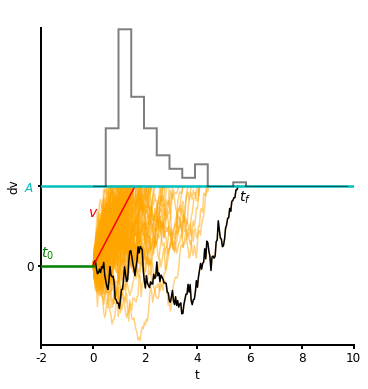

In [148]:
def plot_DDMexample31(mean, std, A, t0, N=100, title=''):
    """plot example of DDM with specified parameters"""

    fig, ax = plt.subplots(1, 1, figsize=(5, 5))
    trials = [generate_trials(mean, std, A, 0) for _ in range(N)]

    example_plot = True
    for dv in trials:
        dv[-1] = A
        x = np.arange(len(dv))/25
        y = dv
        if len(y) > 5*25 and example_plot:
            ax.plot(x, y, c='k', lw=1.5, zorder=4)
            ax.annotate(r'$t_f$', (len(y)/25, A-2), (0, 1), xycoords="data", textcoords="offset points", color="k", zorder=4, fontsize=14)
            example_plot = False
        ax.plot(x, y, c='orange', alpha=.5, zorder=3)

    waits = np.array([len(t)/25 for t in trials], dtype=np.float64)

    waitmean = A / mean * np.tanh(mean * A)  #  + t0
    ax.plot(np.linspace(0, waitmean/25, int(waitmean)+1), A / waitmean * np.arange(waitmean), c="r", zorder=4)
    ax.annotate(r'$v$', ((waitmean/25)/2-1, (A/2)+1), (0, 1), xycoords="data", textcoords="offset points", color="r", zorder=4, fontsize=14)
    # ax.spines['left'].set_position(('data', t0))
    # ax.axhline(0, xmin=t0, c="k", ls="--", zorder=5, lw=2.5)
    ax.axhline(A, c='c', zorder=5, lw=2.5)
    ax.set_yticks([0, A])
    ax.set_yticklabels([0, r'$A$'])
    ax.get_yticklabels()[1].set_color('c')
    ax.set_xlabel('t')
    ax.set_ylabel('dv')
    ax.set_title(title)
    ax.set_ylim(-10, 30)
    ax.set_xlim(-2, 10)
    ax.plot((0, -t0), (0, 0), c="g", zorder=5, lw=2.5)
    ax.annotate(r'$t_0$', ((0-t0), 1), (0, 0), xycoords="data", textcoords="offset points", color="g", zorder=4, fontsize=14)

    # inset distribution
    l, b, h, w = 0.105, .55, .5, .85
    ax1 = fig.add_axes([l, b, w, h])
    mx = 300
    bins = np.arange(0, mx+1, .5)
    ax1.hist(waits, bins=bins, color='k',
             alpha=.5, zorder=4, histtype="step", lw=2,
             # cumulative=1,
             density=True,
             weights=np.ones_like(waits) / len(waits),
             )
    ax1.set_ylim(0, 0.8)
    ax1.set_xlim(-2, 10)
    ax1.set_ylabel('PDF')
    ax1.axis('off')

    # inset

    plt.savefig('DDM1.png', transparent=True, dpi=300)


plot_DDMexample31(.25, std, 10, t0, N=N, title="")

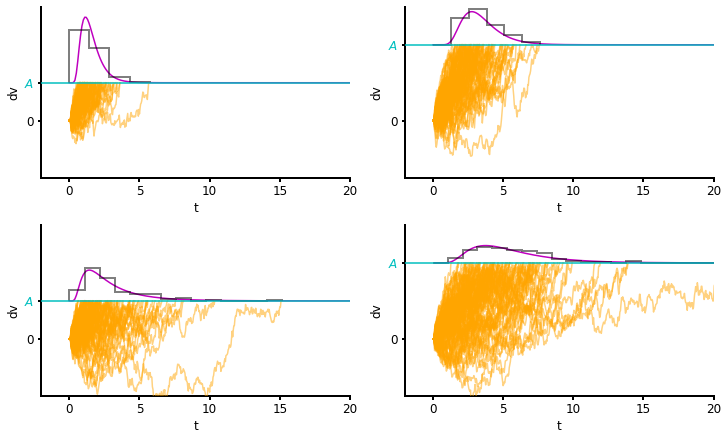

In [178]:
std = 1
t0 = 2
N = 100
def plot_DDMexample2(mean, std, A, t0, N=100, title=''):
    """plot example of DDM with specified parameters"""

    fig, ax = plt.subplots(1, 1, figsize=(5, 5))
    trials = [generate_trials(mean, std, A, 0) for _ in range(N)]

    example_plot = True
    for dv in trials:
        dv[-1] = A
        x = np.arange(len(dv))/25
        y = dv

        ax.plot(x, y, c='orange', alpha=.5, zorder=3)

    waits = np.array([len(t)/25 for t in trials], dtype=np.float64)

    waitmean = A / mean * np.tanh(mean * A)  #  + t0
    ax.axhline(A, c='c', zorder=5, lw=2.5)
    ax.set_yticks([0, A])

    ax.set_xlabel('t')

    ax.set_title(title)
    ax.set_ylim(-10, 30)
    ax.set_xlim(-2, 10)
    ax.plot((0, -t0), (0, 0), c="k", zorder=5, lw=2)

        # inset distribution
    l, b, h, w = 0.105, .55, .5, .85
    ax1 = fig.add_axes([l, b, w, h])
    mx = 300
    bins = np.arange(0, mx+1, .5)
    ax1.hist(waits, bins=bins, color='k',
             alpha=.5, zorder=4, histtype="step", lw=2,
             # cumulative=1,
             density=True,
             weights=np.ones_like(waits) / len(waits)*25,
             )
    ax1.set_ylim(0, 0.8)
    ax1.set_xlim(-2, 10)
    ax1.set_ylabel('PDF')
    ax1.axis('off')

    p, _ = wald_fit(waits)
    x = np.linspace(0, 1000, 10000)
    ax1.plot(x, 25*Wald_pdf(x, *p)+A, 'm-', label='Default')
    plt.savefig(f'DDM_A{A}_G{mean}.png', transparent=True, dpi=300)

def plot_DDMexampleParams1(v, A, ax=None):
    mean = v
    if ax is None:
        ax = plt.gca()
    N = 100
    t0 = 2
    std = 1
    # np.random.seed(0)
    trials = [generate_trials(mean, std, A, t0) for _ in range(N)]

    rnd = np.random.randint(0, len(trials))
    for dv in trials:
        dv[-1] = A
        x = np.arange(len(dv))/25
        y = dv

        ax.plot(x, y, c='orange', alpha=.5, zorder=3)

    waits = np.array([len(t)/25 for t in trials], dtype=np.float64)

    bins = np.linspace(0, waits.max(), int(max(waits)))
    ax.hist(waits, bins=bins, color='k', bottom=A,
            alpha=.5, zorder=4, histtype="step", lw=2,
            weights=np.ones_like(waits) / len(waits)*25,
            )

    p, _ = wald_fit(waits)
    x = np.linspace(0, 1000, 10000)
    ax.plot(x, (25*Wald_pdf(x, *p))+A, 'm-', label='Default')

   
    ax.axhline(A, c='c', zorder=4)
    ax.set_yticks([0, A])
    ax.set_yticklabels([0, r'$A$'])
    ax.get_yticklabels()[1].set_color('c')
    ax.set_xlabel('t')
    ax.set_ylabel('dv')
    ax.set_title('')
    ax.set_ylim(-15, 30)
    ax.set_xlim(-2, 20)



fig, ax = plt.subplots(2, 2, figsize=(10, 6))
plot_DDMexampleParams1(.25,  10, ax=ax[0, 0])
plot_DDMexampleParams1(.25,  20, ax=ax[0, 1])
plot_DDMexampleParams1(.15,  10, ax=ax[1, 0])
plot_DDMexampleParams1(.15,  20, ax=ax[1, 1])

# animations

In [164]:
# same plot but interactive
pl = interact(plot_DDMexampleParams, v=(0, 2, 0.1), A=(0, 5, 0.1));

interactive(children=(FloatSlider(value=1.0, description='v', max=2.0), FloatSlider(value=2.0, description='A'…

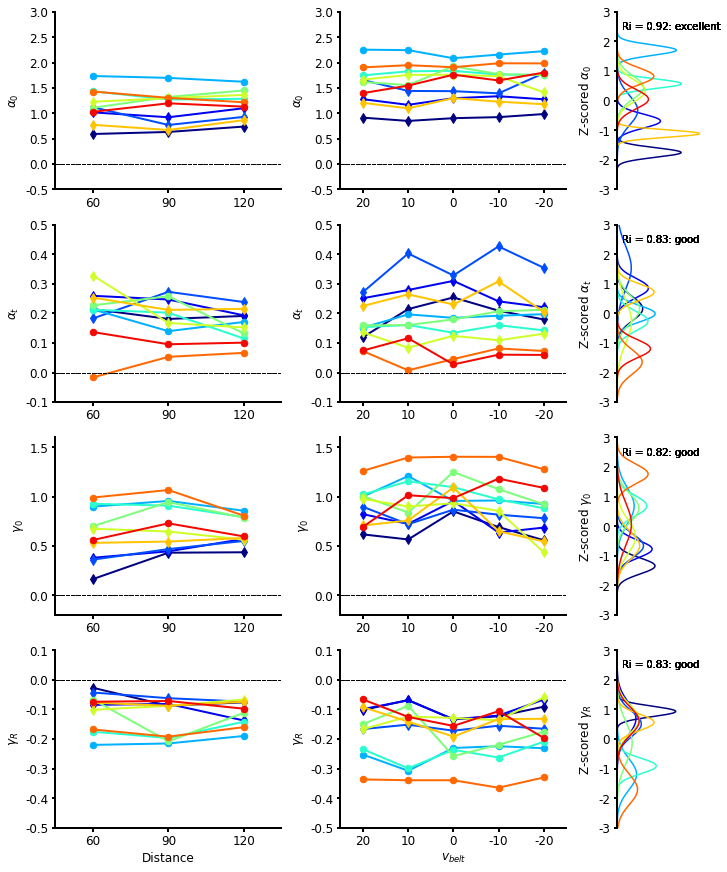

In [185]:
fig, axs = plt.subplots(4, 3, figsize=(10, 12), gridspec_kw={'width_ratios': [5, 5, 2]})
ylabels = [r'$\alpha_0$', r"$\alpha_t$", r'$\gamma_0$', r"$\gamma_R$"]
ylims = [[-.5, 3], [-.1, .5], [-.2, 1.6], [-.5, .1]]
alpha_t_fixed, gamma_t_fixed, alpha_R_fixed, gamma_R_fixed = False, False, False, False

alpha, gamma, alpha_t, gamma_t, alpha_R, gamma_R, lossWald = {}, {}, {}, {}, {}, {}, {}
alpha_fit, gamma_fit, alpha_t_fit, gamma_t_fit, alpha_R_fit, gamma_R_fit = {}, {}, {}, {}, {}, {}

if os.path.exists("picklejar/idle_time_model_parameters_fit.p"):
    alpha, alpha_t, alpha_R, gamma, gamma_t, gamma_R, lossWald = pickle.load(open("picklejar/idle_time_model_parameters_fit.p", "rb"))
else:
    if os.path.exists("picklejar/resamplingParameters100ITER.p"):
        alpha_fit, gamma_fit, alpha_t_fit, gamma_t_fit, alpha_R_fit, gamma_R_fit = pickle.load(open("picklejar/resamplingParameters100ITER.p", "rb"))

    for animal in animalList:
        alpha[animal] = {"60": 0, "90": 0, "120": 0, "20": 0, "10": 0, "2": 0, "rev10": 0, "rev20": 0}
        gamma[animal] = {"60": 0, "90": 0, "120": 0, "20": 0, "10": 0, "2": 0, "rev10": 0, "rev20": 0}
        alpha_t[animal] = {"60": 0, "90": 0, "120": 0, "20": 0, "10": 0, "2": 0, "rev10": 0, "rev20": 0}
        gamma_t[animal] = {"60": 0, "90": 0, "120": 0, "20": 0, "10": 0, "2": 0, "rev10": 0, "rev20": 0}
        alpha_R[animal] = {"60": 0, "90": 0, "120": 0, "20": 0, "10": 0, "2": 0, "rev10": 0, "rev20": 0}
        gamma_R[animal] = {"60": 0, "90": 0, "120": 0, "20": 0, "10": 0, "2": 0, "rev10": 0, "rev20": 0}
        lossWald[animal] = {"60": 0, "90": 0, "120": 0, "20": 0, "10": 0, "2": 0, "rev10": 0, "rev20": 0}

        for cond, data in zip(["60", "90", "120", "20", "10", "2", "rev10", "rev20"], [data60, data90, data120, data20, data10, data2, datarev10, datarev20]):
            (alpha[animal][cond], theta, gamma[animal][cond], \
            alpha_t[animal][cond], thetaprime, gamma_t[animal][cond], \
            alpha_R[animal][cond], thetasecond, gamma_R[animal][cond]), lossWald[animal][cond] = modelwald_fit(data[animal], alpha_t_fixed=alpha_t_fixed, 
                                                                                                                                        gamma_t_fixed=gamma_t_fixed, 
                                                                                                                                        alpha_R_fixed=alpha_R_fixed, 
                                                                                                                                        gamma_R_fixed=gamma_R_fixed, 
                                                                                                                                        )

vars = [alpha, alpha_t, gamma, gamma_R]
resampled = [alpha_fit, alpha_t_fit, alpha_R_fit, gamma_fit, gamma_t_fit, gamma_R_fit]
        
for animal in animalList:
    for i, (var, ylabel, ylim, resample) in enumerate(zip(vars, ylabels, ylims, resampled)):
        x, y = np.arange(3), [var[animal]["60"], var[animal]["90"], var[animal]["120"]]
        axs[i, 0].plot(x, y, color=rat_markers[animal][0], label=animal, marker=rat_markers[animal][1], markersize=6.5, lw=2)
        axs[i, 0].set_title(f"")
        axs[i, 0].set_xticks(np.arange(3))
        axs[i, 0].set_xticklabels(["60", "90", "120"])
        axs[i, 0].set_ylabel(ylabel)
        axs[i, 0].set_xlim(-.5, 2.5)
        axs[i, 0].set_ylim(ylim)
        axs[i, 0].axhline(0, color='black', linestyle='--', linewidth=1)

    for i, (var, ylabel, ylim, resample) in enumerate(zip(vars, ylabels, ylims, resampled)):
        x, y = np.arange(5), [var[animal]["20"], var[animal]["10"], var[animal]["2"], var[animal]["rev10"], var[animal]["rev20"]]
        axs[i, 1].plot(x, y, color=rat_markers[animal][0], label=animal, marker=rat_markers[animal][1], markersize=6.5, lw=2)
        axs[i, 1].set_title(f"")
        axs[i, 1].set_xticks(np.arange(5))
        axs[i, 1].set_xticklabels(["20", "10", "0", "-10", "-20"])
        axs[i, 1].set_ylabel(ylabel)
        axs[i, 1].set_xlim(-.5, 4.5)
        axs[i, 1].set_ylim(ylim)
        axs[i, 1].axhline(0, color='black', linestyle='--', linewidth=1)

axs[i, 0].set_xlabel("Distance")
axs[i, 1].set_xlabel(r'$v_{belt}$')


Zalpha = {animal: {key: (alpha[animal][key] - np.mean([alpha[animal][key] for animal in animalList]))/np.std([alpha[animal][key] for animal in animalList]) for key in alpha[animal]} for animal in animalList}
Zalpha_t = {animal: {key: (alpha_t[animal][key] - np.mean([alpha_t[animal][key] for animal in animalList]))/np.std([alpha_t[animal][key] for animal in animalList]) for key in alpha_t[animal]} for animal in animalList}
Zalpha_R = {animal: {key: (alpha_R[animal][key] - np.mean([alpha_R[animal][key] for animal in animalList]))/np.std([alpha_R[animal][key] for animal in animalList]) for key in alpha_R[animal]} for animal in animalList}
Zgamma = {animal: {key: (gamma[animal][key] - np.mean([gamma[animal][key] for animal in animalList]))/np.std([gamma[animal][key] for animal in animalList]) for key in gamma[animal]} for animal in animalList}
Zgamma_t = {animal: {key: (gamma_t[animal][key] - np.mean([gamma_t[animal][key] for animal in animalList]))/np.std([gamma_t[animal][key] for animal in animalList]) for key in gamma_t[animal]} for animal in animalList}
Zgamma_R = {animal: {key: (gamma_R[animal][key] - np.mean([gamma_R[animal][key] for animal in animalList]))/np.std([gamma_R[animal][key] for animal in animalList]) for key in gamma_R[animal]} for animal in animalList}

traits = {animal: [] for animal in animalList}
Zvars = [Zalpha, Zalpha_t, Zgamma, Zgamma_R]
for j, zvar in enumerate(Zvars):
    for animal in animalList:
        zscores = [zvar[animal][cond] for cond in ["60", "90", "120", "20", "10", "2", "rev10", "rev20"]]
        pdf = stats.norm.pdf(np.linspace(-3, 3, 600), np.mean(zscores), np.std(zscores))
        traits[animal].append(np.mean(zscores))
        axs[j, 2].plot(pdf, np.linspace(-3, 3, 600), color=rat_markers[animal][0], linestyle=lines[brainstatus[animal]])
        Ri = compute_Ri(zvar, animalList)
        axs[j, 2].annotate(f'Ri = {Ri:.2f}: {interpret_Ri(Ri)}', xy=(0.05, 0.9), xycoords='axes fraction')
        axs[j, 2].set_ylim(-3, 3)
        axs[j, 2].set_xlim(0, 3.5)

        axs[j, 2].set_ylabel("Z-scored " + ylabels[j])
        axs[j, 2].set_xlabel("")
        axs[j, 2].set_xticks([])
        axs[j, 2].spines['bottom'].set_visible(False)


Ri = 0.71: moderate
Ri = 0.71: moderate
Ri = 0.71: moderate
Ri = 0.71: moderate
Ri = 0.71: moderate
Ri = 0.71: moderate
Ri = 0.71: moderate
Ri = 0.71: moderate
Ri = 0.71: moderate
Ri = 0.71: moderate
Ri = 0.82: good
Ri = 0.82: good
Ri = 0.82: good
Ri = 0.82: good
Ri = 0.82: good
Ri = 0.82: good
Ri = 0.82: good
Ri = 0.82: good
Ri = 0.82: good
Ri = 0.82: good
Ri = 0.77: moderate
Ri = 0.77: moderate
Ri = 0.77: moderate
Ri = 0.77: moderate
Ri = 0.77: moderate
Ri = 0.77: moderate
Ri = 0.77: moderate
Ri = 0.77: moderate
Ri = 0.77: moderate
Ri = 0.77: moderate
Ri = 0.61: poor
Ri = 0.61: poor
Ri = 0.61: poor
Ri = 0.61: poor
Ri = 0.61: poor
Ri = 0.61: poor
Ri = 0.61: poor
Ri = 0.61: poor
Ri = 0.61: poor
Ri = 0.61: poor


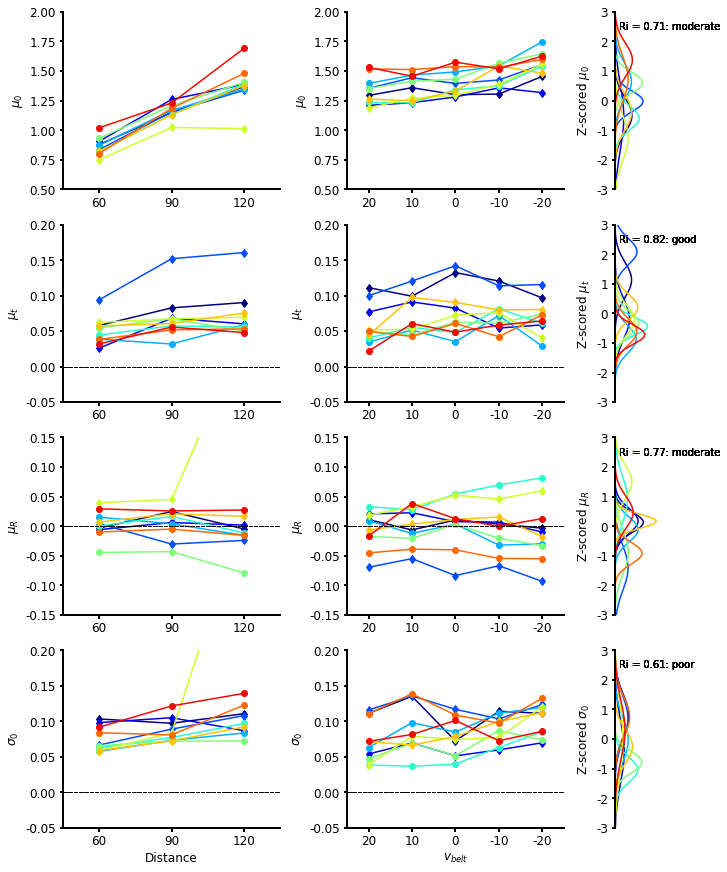

In [222]:
fig, axs = plt.subplots(4, 3, figsize=(10, 12), gridspec_kw={'width_ratios': [5, 5, 2]})
ylabels = [r'$\mu_0$', r"$\mu_t$", r"$\mu_R$", r'$\sigma_0$']
ylims = [[.5, 2], [-.05, .2], [-.15, .15], [-.05, .2]]
mu_t_fixed, sigma_t_fixed, mu_R_fixed, sigma_R_fixed = False, False, False, False
# mu_t_fixed, sigma_t_fixed, mu_R_fixed, sigma_R_fixed = False, True, True, False
# mu_t_fixed, sigma_t_fixed, mu_R_fixed, sigma_R_fixed = False, False, True, False
# mu_t_fixed, sigma_t_fixed, mu_R_fixed, sigma_R_fixed = True, True, True, True

mu, mu_t, mu_R, sigma, sigma_t, sigma_R, loss = {}, {}, {}, {}, {}, {}, {}
if os.path.exists("picklejar/running_time_model_parameters_fit.p"):
    mu, mu_t, mu_R, sigma, sigma_t, sigma_R, loss = pickle.load(open("picklejar/running_time_model_parameters_fit.p", "rb"))
else:
    for animal in animalList:
        mu[animal] = {"60": 0, "90": 0, "120": 0, "20": 0, "10": 0, "2": 0, "rev10": 0, "rev20": 0}
        sigma[animal] = {"60": 0, "90": 0, "120": 0, "20": 0, "10": 0, "2": 0, "rev10": 0, "rev20": 0}
        mu_t[animal] = {"60": 0, "90": 0, "120": 0, "20": 0, "10": 0, "2": 0, "rev10": 0, "rev20": 0}
        sigma_t[animal] = {"60": 0, "90": 0, "120": 0, "20": 0, "10": 0, "2": 0, "rev10": 0, "rev20": 0}
        mu_R[animal] = {"60": 0, "90": 0, "120": 0, "20": 0, "10": 0, "2": 0, "rev10": 0, "rev20": 0}
        sigma_R[animal] = {"60": 0, "90": 0, "120": 0, "20": 0, "10": 0, "2": 0, "rev10": 0, "rev20": 0}
        loss[animal] = {"60": 0, "90": 0, "120": 0, "20": 0, "10": 0, "2": 0, "rev10": 0, "rev20": 0}

        for cond, data in zip(["60", "90", "120", "20", "10", "2", "rev10", "rev20"], [data60, data90, data120, data20, data10, data2, datarev10, datarev20]):
            (mu[animal][cond], sigma[animal][cond], \
            mu_t[animal][cond], sigma_t[animal][cond], \
            mu_R[animal][cond], sigma_R[animal][cond]), loss[animal][cond] = modelrun_fit(data[animal], mu_t_fixed=mu_t_fixed, 
                                                                                                                                        sigma_t_fixed=sigma_t_fixed, 
                                                                                                                                        mu_R_fixed=mu_R_fixed, 
                                                                                                                                        sigma_R_fixed=sigma_R_fixed, 
                                                                                                                                        )
vars = [mu, mu_t, mu_R, sigma,]
for animal in animalList:
    for i, (var, ylabel, ylim) in enumerate(zip(vars, ylabels, ylims)):
        axs[i, 0].plot(np.arange(3), [var[animal]["60"], var[animal]["90"], var[animal]["120"]], color=rat_markers[animal][0], label=animal, marker=rat_markers[animal][1])
        axs[i, 0].set_title(f"")
        axs[i, 0].set_xticks(np.arange(3))
        axs[i, 0].set_xticklabels(["60", "90", "120"])
        axs[i, 0].set_ylabel(ylabel)
        axs[i, 0].set_xlim(-.5, 2.5)
        axs[i, 0].set_ylim(ylim)
        axs[i, 0].axhline(0, color='black', linestyle='--', linewidth=1)

    for i, (var, ylabel, ylim) in enumerate(zip(vars, ylabels, ylims)):
        axs[i, 1].plot(np.arange(5), [var[animal]["20"], var[animal]["10"], var[animal]["2"], var[animal]["rev10"], var[animal]["rev20"]], color=rat_markers[animal][0], label=animal, marker=rat_markers[animal][1])
        axs[i, 1].set_title(f"")
        axs[i, 1].set_xticks(np.arange(5))
        axs[i, 1].set_xticklabels(["20", "10", "0", "-10", "-20"])
        axs[i, 1].set_ylabel(ylabel)
        axs[i, 1].set_xlim(-.5, 4.5)
        axs[i, 1].set_ylim(ylim)
        axs[i, 1].axhline(0, color='black', linestyle='--', linewidth=1)
    
axs[i, 0].set_xlabel("Distance")
axs[i, 1].set_xlabel(r'$v_{belt}$')

Zmu = {animal: {key: (mu[animal][key] - np.mean([mu[animal][key] for animal in animalList]))/np.std([mu[animal][key] for animal in animalList]) for key in mu[animal]} for animal in animalList}
Zmu_t = {animal: {key: (mu_t[animal][key] - np.mean([mu_t[animal][key] for animal in animalList]))/np.std([mu_t[animal][key] for animal in animalList]) for key in mu_t[animal]} for animal in animalList}
Zmu_R = {animal: {key: (mu_R[animal][key] - np.mean([mu_R[animal][key] for animal in animalList]))/np.std([mu_R[animal][key] for animal in animalList]) for key in mu_R[animal]} for animal in animalList}
Zsigma = {animal: {key: (sigma[animal][key] - np.mean([sigma[animal][key] for animal in animalList]))/np.std([sigma[animal][key] for animal in animalList]) for key in sigma[animal]} for animal in animalList}
Zsigma_t = {animal: {key: (sigma_t[animal][key] - np.mean([sigma_t[animal][key] for animal in animalList]))/np.std([sigma_t[animal][key] for animal in animalList]) for key in sigma_t[animal]} for animal in animalList}
Zsigma_R = {animal: {key: (sigma_R[animal][key] - np.mean([sigma_R[animal][key] for animal in animalList]))/np.std([sigma_R[animal][key] for animal in animalList]) for key in sigma_R[animal]} for animal in animalList}

traits = {animal: [] for animal in animalList}
Zvars = [Zmu, Zmu_t, Zmu_R, Zsigma]
for j, zvar in enumerate(Zvars):
    for animal in animalList:
        zscores = [zvar[animal][cond] for cond in ["60", "90", "120", "20", "10", "2", "rev10", "rev20"]]
        pdf = stats.norm.pdf(np.linspace(-3, 3, 600), np.mean(zscores), np.std(zscores))
        traits[animal].append(np.mean(zscores))
        axs[j, 2].plot(pdf, np.linspace(-3, 3, 600), color=rat_markers[animal][0], linestyle=rat_markers[animal][2])
        Ri = compute_Ri(zvar, animalList)
        print(f'Ri = {Ri:.2f}: {interpret_Ri(Ri)}')
        axs[j, 2].annotate(f'Ri = {Ri:.2f}: {interpret_Ri(Ri)}', xy=(0.05, 0.9), xycoords='axes fraction')
        axs[j, 2].set_ylim(-3, 3)
        axs[j, 2].set_ylabel("Z-scored " + ylabels[j])
        axs[j, 2].set_xlabel("")
        axs[j, 2].set_xticks([])
        axs[j, 2].set_xlim(0, 3.5)
        axs[j, 2].spines['bottom'].set_visible(False)
# pickle.dump([mu, mu_t, mu_R, sigma, sigma_t, sigma_R, loss], open("picklejar/running_time_model_parameters_fit.p", "wb"))
# pickle.dump(traits, open("picklejar/running_time_model_traits.p", "wb"))

In [198]:
def intuition_Ri(gain=0):
    fig, axs = plt.subplots(1, 2, figsize=(6, 3))
    IDs = ["ID1", "ID2", "ID3", "ID4", "ID5", "ID6", "ID7", "ID8"]
    conditions = ['cond1', 'cond2', 'cond3', 'cond4', 'cond5', 'cond6', 'cond7', 'cond8']
    mock = {ID: {k: 0 for k in conditions} for ID in IDs}
    for idx, ID in enumerate(IDs):
        for cond in conditions:
            mock[ID][cond] = np.random.normal(idx*gain, .25)

    Zmock = {ID: {key: (mock[ID][key] - np.mean([mock[ID][key] for ID in IDs]))/np.std([mock[ID][key] for ID in IDs]) for key in mock[ID]} for ID in IDs}


    for c, ID in enumerate(IDs):
        zscores = [Zmock[ID][cond] for cond in conditions]
        axs[0].plot(np.arange(8), zscores, color=plt.cm.get_cmap('jet')(c/8))
        pdf = stats.norm.pdf(np.linspace(-3, 3, 600), np.mean(zscores), np.std(zscores))
        axs[1].plot(pdf, np.linspace(-3, 3, 600), color=plt.cm.get_cmap('jet')(c/8))
        Ri = compute_Ri(Zmock, IDs, conditions)
        axs[1].annotate(f'Ri = {Ri:.2f}: {interpret_Ri(Ri)}', xy=(0.05, 0.9), xycoords='axes fraction')
    axs[1].set_ylim(-3, 3)
    axs[0].set_ylim(-3, 3)
    return fig, axs

pl = interact(intuition_Ri, gain=(0, .5, .01))

interactive(children=(FloatSlider(value=0.0, description='gain', max=0.5, step=0.01), Output()), _dom_classes=…

(<Figure size 432x216 with 2 Axes>,
 array([<AxesSubplot:>, <AxesSubplot:>], dtype=object))

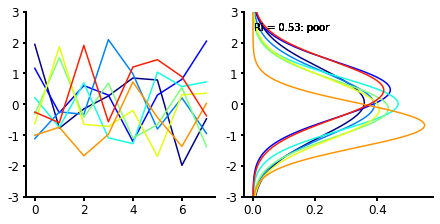

In [199]:
intuition_Ri(0)

(<Figure size 432x216 with 2 Axes>,
 array([<AxesSubplot:>, <AxesSubplot:>], dtype=object))

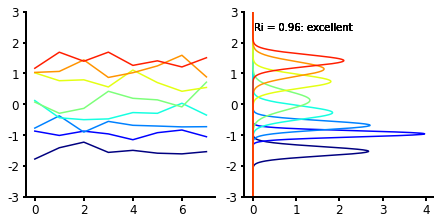

In [200]:
intuition_Ri(.5)

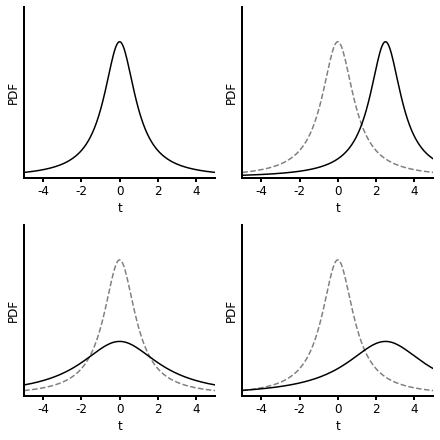

In [213]:
fig, axs = plt.subplots(2, 2, figsize=(6, 6))
x = np.linspace(-5, 50, 1000)
axs[0, 0].plot(x, stats.cauchy.pdf(x, 0, 1), 'k-', label='Default')
axs[0, 1].plot(x, stats.cauchy.pdf(x, 2.5, 1), 'k', label='increased mu')
axs[1, 0].plot(x, stats.cauchy.pdf(x, 0, 2.5), 'k', label='increased sigma')
axs[1, 1].plot(x, stats.cauchy.pdf(x, 2.5, 2.5), 'k', label='increased sigma')

axs[0, 1].plot(x, stats.cauchy.pdf(x, 0, 1), 'k--', alpha=.5, label='Default')
axs[1, 0].plot(x, stats.cauchy.pdf(x, 0, 1), 'k--', alpha=.5, label='Default')
axs[1, 1].plot(x, stats.cauchy.pdf(x, 0, 1), 'k--', alpha=.5, label='Default')

for ax in axs.flatten():
    ax.set_ylim(0, .4)
    ax.set_xlim(-5, 5)
    ax.set_ylabel('PDF')
    ax.set_xlabel('t')
    ax.set_yticks([])



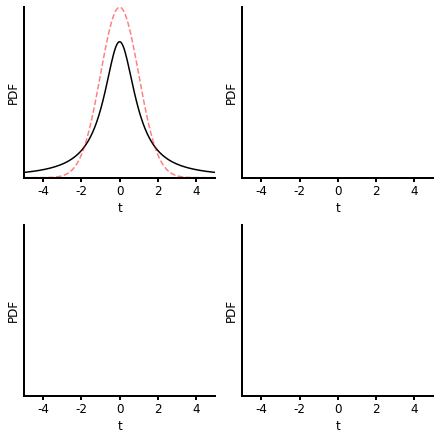

In [215]:
fig, axs = plt.subplots(2, 2, figsize=(6, 6))
x = np.linspace(-5, 50, 1000)
axs[0, 0].plot(x, stats.cauchy.pdf(x, 0, 1), 'k-', label='Default')

axs[0, 0].plot(x, stats.norm.pdf(x, 0, 1), 'r--', alpha=.5, label='Default')

for ax in axs.flatten():
    ax.set_ylim(0, .4)
    ax.set_xlim(-5, 5)
    ax.set_ylabel('PDF')
    ax.set_xlabel('t')
    ax.set_yticks([])